# What is a Random Forest Algorithm?
- Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.
- Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.
- The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.
- It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.

##  About Dataset
**About the data:**
- Undergrad : person is under graduated or not
- Marital.Status : marital status of a person
- Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government
- Work Experience : Work experience of an individual person
- Urban : Whether that person belongs to urban area or not


## Problem Statement:
**Use Random Forest to prepare a model on fraud data.** 

Treating those who have taxable_income <= 30000 as "Risky" and others are "Good".


In [143]:
# Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from dataprep.eda import create_report

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,BaggingClassifier,AdaBoostClassifier,StackingClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score,f1_score
from sklearn.model_selection import train_test_split,KFold,cross_val_score


import warnings
warnings.filterwarnings('ignore')


In [49]:
# Load the dataset
data=pd.read_csv('Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# Exploratory Data Analysis

In [50]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


- As we can see in the table, 3 categorical column and 3 numerical column.
- No missing value present in dataset.

In [52]:
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [53]:
data.duplicated().sum()

0

No duplicate and null values in dataset.

#### Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”.

In [54]:

data['Tax_category']=data['Taxable.Income'].apply(lambda i : 'Good' if i > 30000 else 'Risky')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [55]:
df=data.copy()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
 6   Tax_category     600 non-null    object
dtypes: int64(3), object(4)
memory usage: 32.9+ KB


In [57]:
cat_features=df.describe(include=['object']).columns
cat_features

Index(['Undergrad', 'Marital.Status', 'Urban', 'Tax_category'], dtype='object')

In [58]:
num_features=df.describe(include=['int64']).columns
num_features

Index(['Taxable.Income', 'City.Population', 'Work.Experience'], dtype='object')

In [59]:
for i in cat_features:
    unique=df[i].value_counts()
    print(unique)
    print(' ')

YES    312
NO     288
Name: Undergrad, dtype: int64
 
Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64
 
YES    302
NO     298
Name: Urban, dtype: int64
 
Good     476
Risky    124
Name: Tax_category, dtype: int64
 


### Now we make this object to numeric columns

In [60]:
df['Undergrad']=df['Undergrad'].apply(lambda x:1 if x=='YES' else 0 )
df['Urban']=df['Urban'].apply(lambda x:1 if x=='YES' else 0)
df['Tax_category']=df['Tax_category'].apply(lambda x:1 if x=='Good' else 0)
df['Marital.Status']=df['Marital.Status'].map({'Single':1,'Married':2,'Divorced':0})
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_category
0,0,1,68833,50047,10,1,1
1,1,0,33700,134075,18,1,1
2,0,2,36925,160205,30,1,1
3,1,1,50190,193264,15,1,1
4,0,2,81002,27533,28,0,1
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,1
596,1,0,69967,55369,2,1,1
597,0,0,47334,154058,0,1,1
598,1,2,98592,180083,17,0,1


# Data visualisation

Index(['Taxable.Income', 'City.Population', 'Work.Experience'], dtype='object')


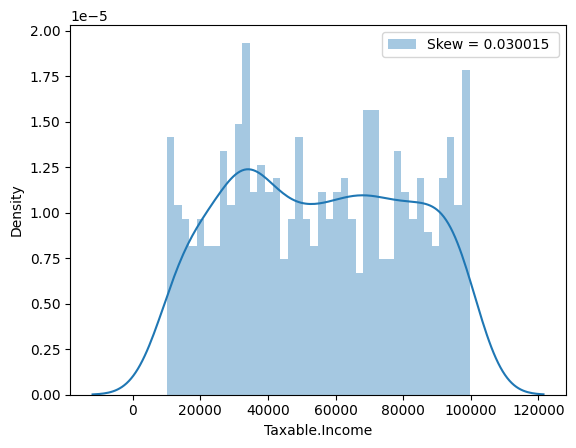

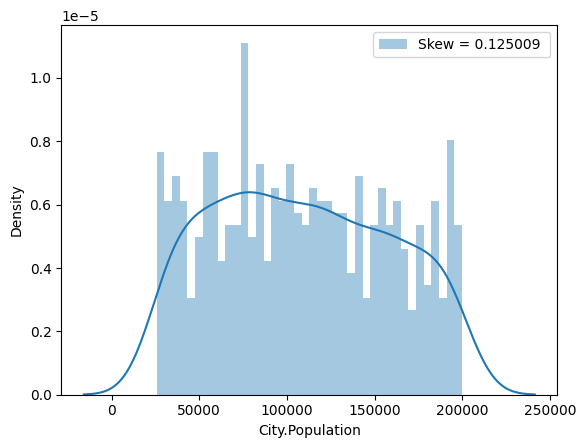

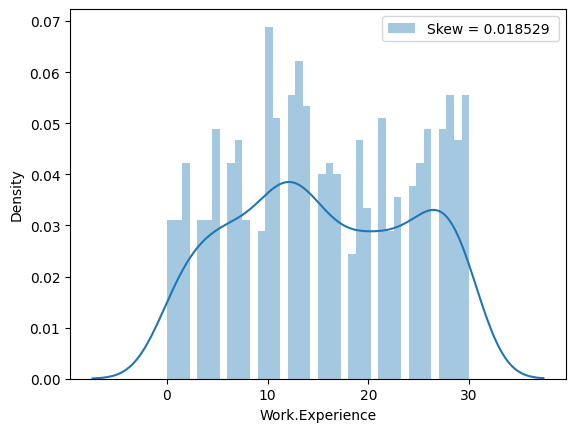

In [61]:
print(num_features)

for i in num_features:
    skew=df[i].skew()
    sn.distplot(df[i],kde=True,bins=40,label='Skew = %3f ' %(skew))
    plt.legend(loc='best')
    plt.show()

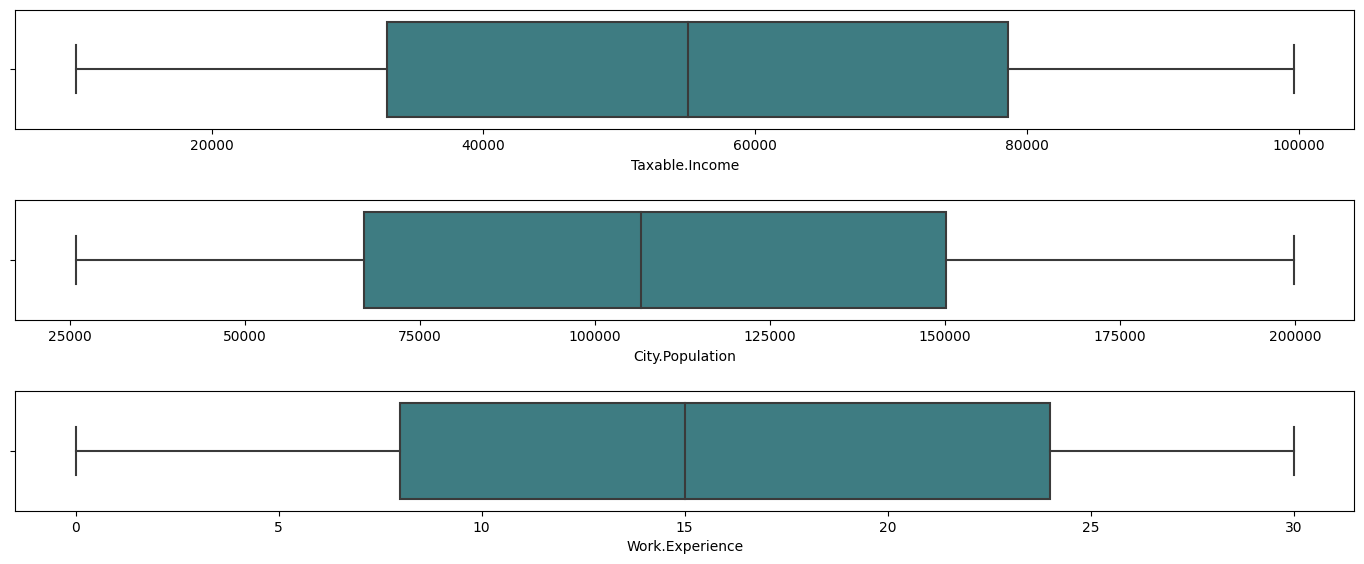

In [62]:
ot=df.copy() 
fig, axes=plt.subplots(3,1,figsize=(14,6),sharex=False,sharey=False)
sn.boxplot(x='Taxable.Income',data=ot,palette='crest',ax=axes[0])
sn.boxplot(x='City.Population',data=ot,palette='crest',ax=axes[1])
sn.boxplot(x='Work.Experience',data=ot,palette='crest',ax=axes[2])
plt.tight_layout(pad=2.0)


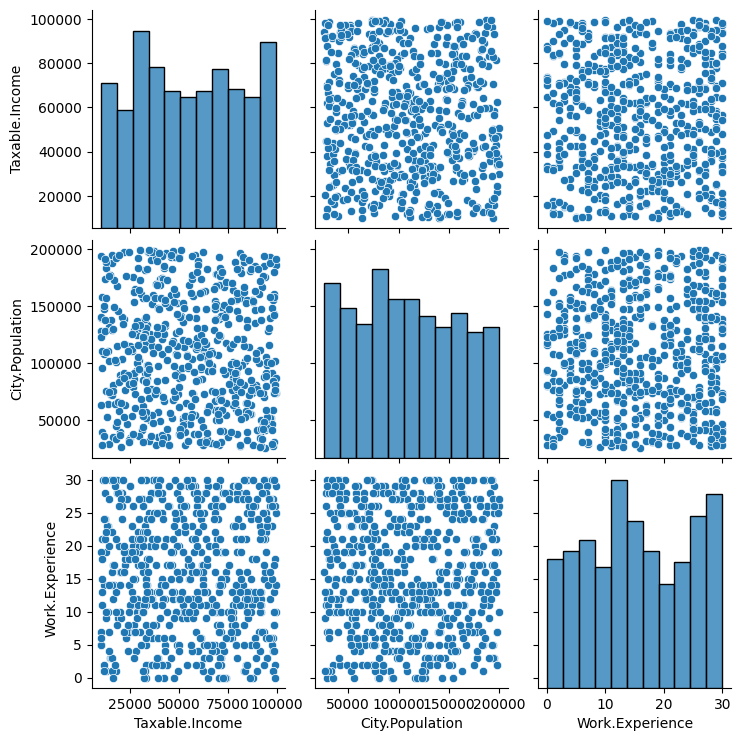

In [63]:
sn.pairplot(df[num_features])

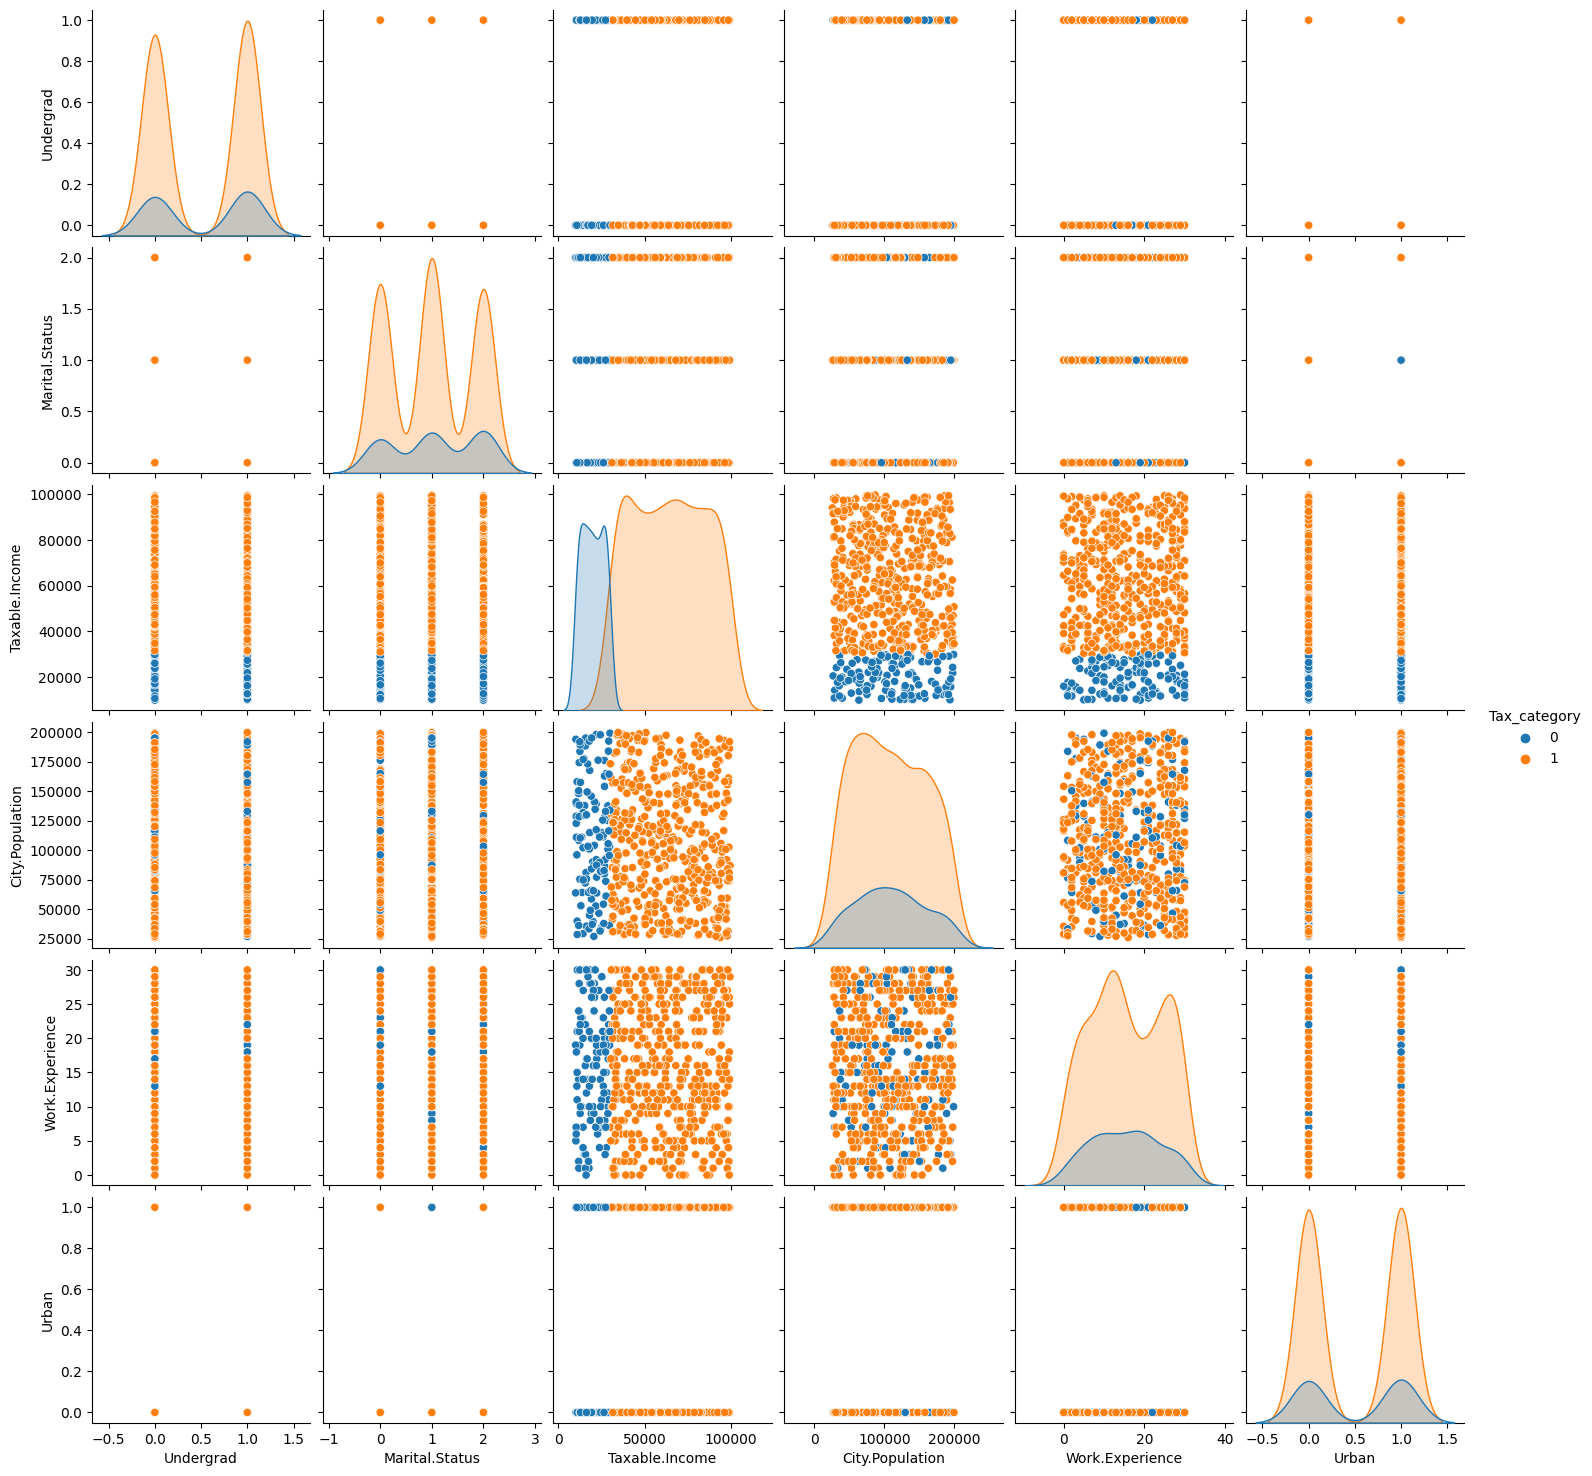

In [64]:
sn.pairplot(df,hue='Tax_category')

<AxesSubplot: >

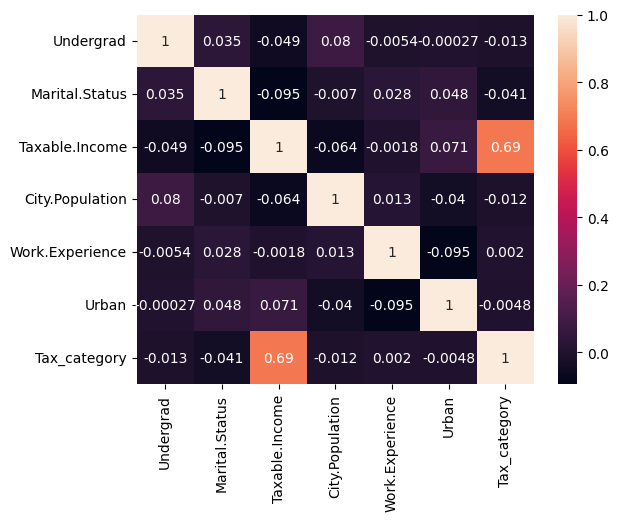

In [65]:
sn.heatmap(df.corr(),annot=True)

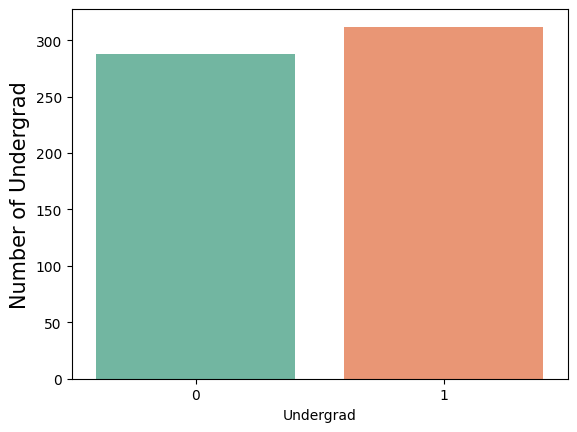

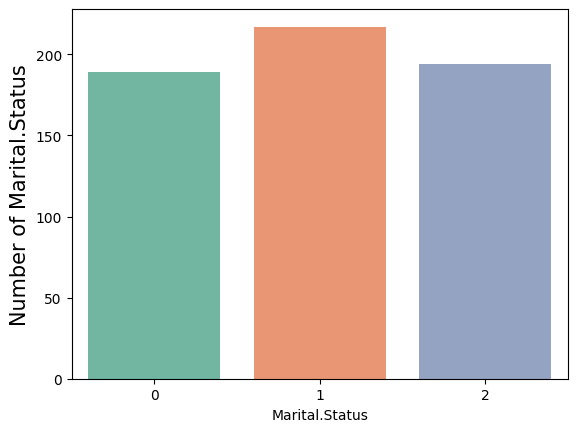

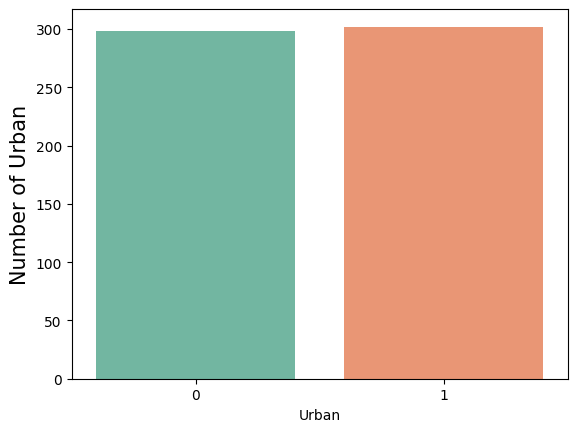

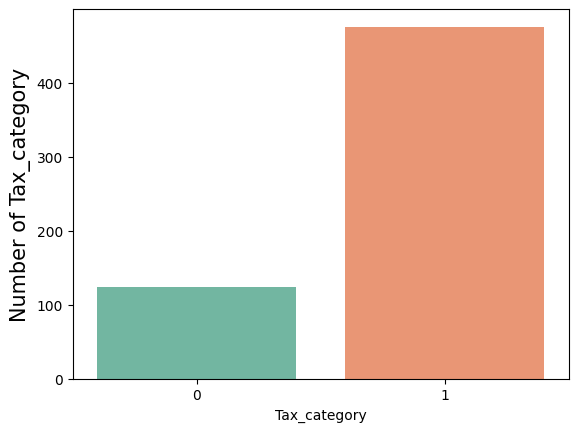

In [66]:
# for categorical Features

for i in cat_features:
    sn.countplot(data=df,x=i,palette='Set2')
    plt.ylabel("Number of "+ i, fontsize=15)

    plt.show()

#### From the above plots we can say that in tax_category data is highly imbalanced.

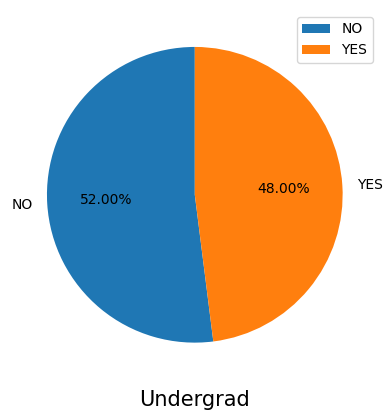

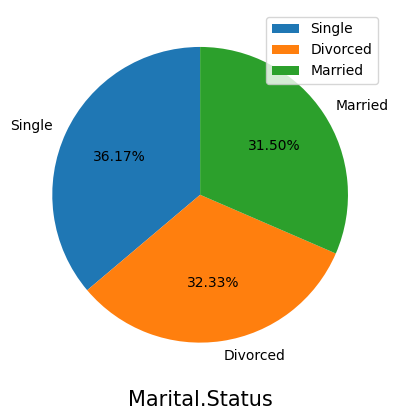

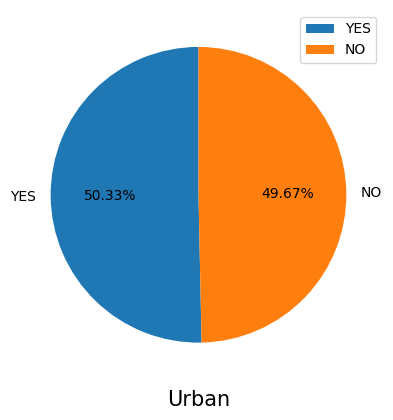

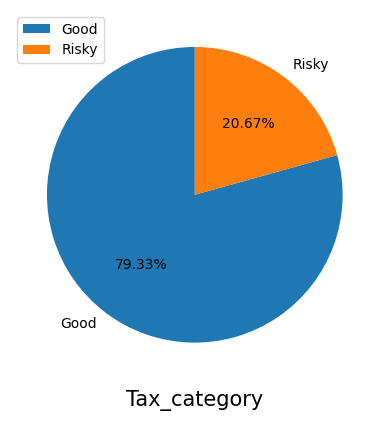

In [67]:

for i in cat_features:
    plt.pie(data[i].value_counts(),
           labels=data[i].unique(),autopct='%.2f%%',
           startangle=90)
    plt.xlabel(i,fontsize=15)
    plt.legend(loc='best')
    plt.show()

# Split the dataset in features and Target

In [68]:
X=df.drop(columns=['Taxable.Income','Tax_category'])
Y=df['Tax_category']
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,1,50047,10,1
1,1,0,134075,18,1
2,0,2,160205,30,1
3,1,1,193264,15,1
4,0,2,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,2,180083,17,0


In [92]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,random_state=42,shuffle=True)
x_train

print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (420, 5)
x_test (180, 5)
y_train (420,)
y_test (180,)


# Random forest Classification

In [93]:
num_trees=100
max_features=4
n_split=15
r_state=10

# if n_splits are more then yhe score is lower
kfold=KFold(n_splits=n_split,shuffle=True,random_state=r_state)

model=RandomForestClassifier(n_estimators=num_trees,max_features=max_features,random_state=1)
result_rfc=cross_val_score(model,x_train,y_train,cv=kfold)

print(result_rfc.mean()*100)


73.8095238095238


# Using various Ensemble Techniques

## Bagging

In [94]:

kfold=KFold(random_state=r_state,shuffle=True)
cart=DecisionTreeClassifier()

model1=BaggingClassifier(base_estimator=cart,n_estimators=num_trees,
                         max_features=max_features,random_state=r_state)

results_bag=cross_val_score(model1,x_train,y_train,cv=kfold)
print(results_bag.mean()*100)

75.23809523809524


## Boosting

In [95]:
# without usinf base estimator
model2=AdaBoostClassifier(n_estimators=num_trees,random_state=r_state)
result_boost=cross_val_score(model2,x_train,y_train,cv=kfold)
print(result_boost.mean()*100)

74.76190476190476


In [96]:
#Using base estimator
model21 = AdaBoostClassifier(base_estimator=cart,n_estimators=num_trees, random_state=r_state)
result_boost1=cross_val_score(model21,x_train,y_train,cv=kfold)
print(result_boost1.mean()*100)

65.47619047619048


#### So, here we can see w/o base estimator the accuracy is more than with estimator.

## Stacking

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


# Create sub models

estimator=[]

model3=LogisticRegression(max_iter=500)
estimator.append(('Logitic', model3))

model4=DecisionTreeClassifier()
estimator.append(('Cart',model4))

model5=SVC()
estimator.append(('SVM',model5))

#Create the ensemble model
ensemble=VotingClassifier(estimator)
result_stack=cross_val_score(ensemble,x_train,y_train,cv=kfold)
print(estimator)
print(result_stack.mean()*100)

[('Logitic', LogisticRegression(max_iter=500)), ('Cart', DecisionTreeClassifier()), ('SVM', SVC())]
79.28571428571429


## So we see that the high accuracy is given by a stacking.

In [105]:
ensemble.fit(x_train,y_train)

VotingClassifier(estimators=[('Logitic', LogisticRegression(max_iter=500)),
                             ('Cart', DecisionTreeClassifier()),
                             ('SVM', SVC())])

In [106]:
ens_pred=ensemble.predict(x_test)
ens_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [113]:
ens_actual_pred=pd.DataFrame({'Actaul':y_test,'Predict':ens_pred})
print(ens_actual_pred['Predict'].value_counts())
ens_actual_pred


1    180
Name: Predict, dtype: int64


,Actaul,Predict
110,0,1
419,1,1
565,1,1
77,1,1
181,0,1
...,...,...
54,1,1
493,0,1
46,1,1
93,0,1


In [136]:
print(classification_report(y_test,ens_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.79      1.00      0.89       143

    accuracy                           0.79       180
   macro avg       0.40      0.50      0.44       180
weighted avg       0.63      0.79      0.70       180



### No misclassification in data
- model is overfitted

### So we use another best model for prediction 

In [109]:
rf_model_pred = model.predict(x_test)
rf_model_actual_predict = pd.DataFrame({'Actual': y_test, 'Predict': rf_model_pred})
rf_model_actual_predict[20:40]


,Actual,Predict
2,1,1
587,1,1
535,1,1
596,1,1
368,1,1
539,1,1
72,1,1
135,0,1
556,1,1
437,0,1


In [110]:
rf_model_actual_predict['Predict'].value_counts()

1    172
0      8
Name: Predict, dtype: int64

In [137]:
print(classification_report(y_test,rf_model_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.78      0.94      0.86       143

    accuracy                           0.75       180
   macro avg       0.39      0.47      0.43       180
weighted avg       0.62      0.75      0.68       180



# Now we use smote technique for imbalanced data

# SMOTE Technique for normalising imbalanced dataset

### SMOTE: Synthetic Minority Oversampling Technique
- SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.

**Working Procedure:**
- At first the total no. of oversampling observations, N is set up. Generally, it is selected such that the binary class distribution is 1:1. 
- But that could be tuned down based on need. Then the iteration starts by first selecting a positive class instance at random. Next, the KNN’s (by default 5) for that instance is obtained. 
- At last, N of these K instances is chosen to interpolate new synthetic instances. To do that, using any distance metric the difference in distance between the feature vector and its neighbors is calculated.
- Now, this difference is multiplied by any random value in (0,1] and is added to the previous feature vector. 

In [114]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [120]:
counter = Counter(y_train)
print('Before',counter)

# oversampling the train dataset using SMOTE
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)
counter = Counter(y_train_sm)
print('After',counter)
print('__________________________________________________________________')

print("Shape of X_train: ",x_train_sm.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train_sm.shape)
print("Shape of y_test",y_test.shape)

Before Counter({1: 333, 0: 87})
After Counter({1: 333, 0: 333})
__________________________________________________________________
Shape of X_train:  (666, 5)
Shape of X_test:  (180, 5)
Shape of y_train:  (666,)
Shape of y_test (180,)


In [123]:
# Random Forest

kfold=KFold(n_splits=n_split,shuffle=True,random_state=r_state)

S_model=RandomForestClassifier(n_estimators=num_trees,max_features=max_features,random_state=1)
S_result_rfc=cross_val_score(S_model,x_train_sm,y_train_sm,cv=kfold)

print(S_result_rfc.mean()*100)


75.82491582491583


In [124]:
# Bagging

kfold=KFold(random_state=r_state,shuffle=True)
cart=DecisionTreeClassifier()

S_model1=BaggingClassifier(base_estimator=cart,n_estimators=num_trees,
                         max_features=max_features,random_state=r_state)

S_results_bag=cross_val_score(S_model1,x_train_sm,y_train_sm,cv=kfold)
print(S_results_bag.mean()*100)

74.47312310627315


In [128]:
# Boosting

S_model2=AdaBoostClassifier(n_estimators=num_trees,random_state=r_state,base_estimator=cart)
S_result_boost=cross_val_score(S_model2,x_train_sm,y_train_sm,cv=kfold)
print(S_result_boost.mean()*100)

69.36146335989226


In [131]:
# Stackinng
# Create sub models

estimator=[]

S_model3=LogisticRegression(max_iter=500)
estimator.append(('Logitic', S_model3))

S_model4=DecisionTreeClassifier()
estimator.append(('Cart',S_model4))

S_model5=SVC()
estimator.append(('SVM',S_model5))

#Create the ensemble model
S_ensemble=VotingClassifier(estimator)
S_result_stack=cross_val_score(ensemble,x_train_sm,y_train_sm,cv=kfold)
print(estimator)
print(S_result_stack.mean()*100)

[('Logitic', LogisticRegression(max_iter=500)), ('Cart', DecisionTreeClassifier()), ('SVM', SVC())]
55.85680619459096


In [133]:
S_ensemble.fit(x_train_sm,y_train_sm)
S_enc_pred=S_ensemble.predict(x_test)
S_enc_pred

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [135]:
print(classification_report(y_test,S_enc_pred))

              precision    recall  f1-score   support

           0       0.21      0.73      0.33        37
           1       0.81      0.30      0.44       143

    accuracy                           0.39       180
   macro avg       0.51      0.52      0.38       180
weighted avg       0.69      0.39      0.42       180



<AxesSubplot: >

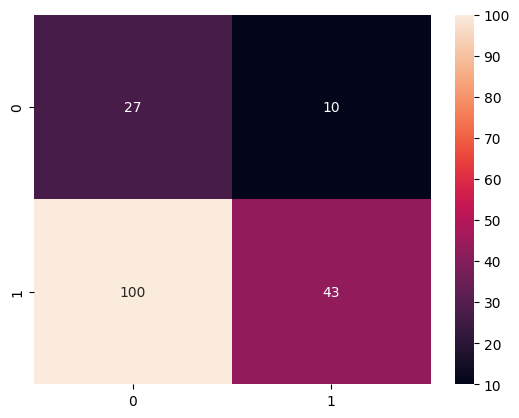

In [144]:
sn.heatmap(confusion_matrix(y_test, S_enc_pred),annot=True,fmt = "d")
